**mathematical tranformation**

log transformation

reciprocal

squera

sqrt

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [2]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-4-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [5]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [6]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

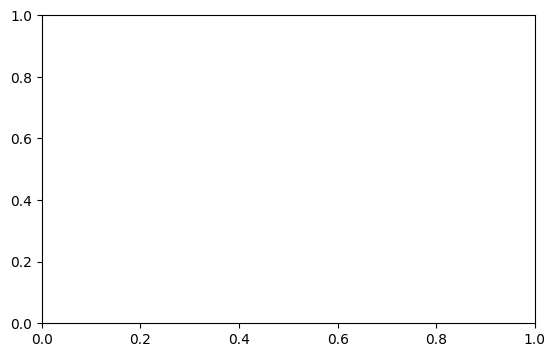

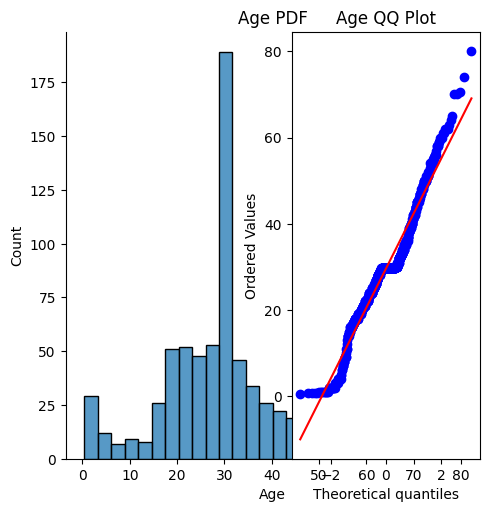

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(x_train['Age'])
plt.title('Age PDF')
plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')
plt.show()



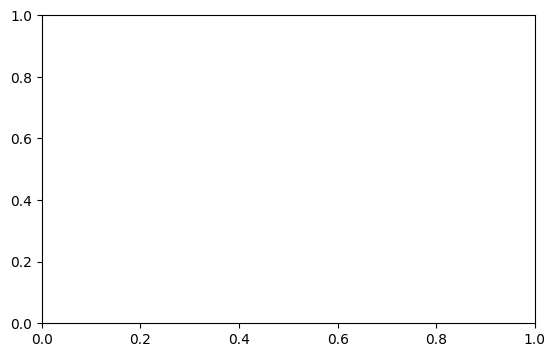

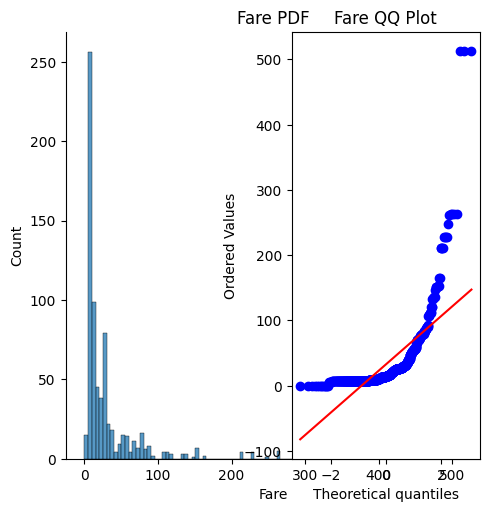

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [10]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6480446927374302

In [11]:
clf2=DecisionTreeClassifier()
clf2.fit(x_train,y_train)
y_pred2=clf2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.664804469273743

In [12]:
trf=FunctionTransformer(np.log1p)
x_train_t=trf.fit_transform(x_train)
x_test_t=trf.transform(x_test)

In [13]:
clf.fit(x_train_t,y_train)
y_pred=clf.predict(x_test_t)
accuracy_score(y_test,y_pred)

0.6815642458100558

In [14]:
clf2.fit(x_train_t,y_train)
y_pred2=clf2.predict(x_test_t)
accuracy_score(y_test,y_pred2)

0.6703910614525139

**box-cox**

***jonson**

type of the power transformer

In [15]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import scipy.stats as stats
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import r2_score
 from sklearn.model_selection import cross_val_score
 from sklearn.linear_model import LinearRegression
 from sklearn.preprocessing import PowerTransformer


In [16]:
df=pd.read_csv('/content/concrete_data.csv')

In [17]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
df.shape

(1030, 9)

In [19]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [20]:
df.describe() #for checking that any zero or negative value ouccur in data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [21]:
#as we can see there is no negative value but there is zero present so there is one solution here

In [22]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.627553179231485

In [25]:
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))


np.float64(0.46099404916628606)

In [26]:
pt = PowerTransformer(method='box-cox')
x_train_t = pt.fit_transform(x_train+0.00001)
x_test_t = pt.transform(x_test+0.00001)

In [27]:
pd.DataFrame({'columns':x_train.columns,'box-cox_lambdas':pt.lambdas_})

,columns,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [28]:
lr=LinearRegression()
lr.fit(x_train_t,y_train)
y_pred=lr.predict(x_test_t)
r2_score(y_test,y_pred)

0.8054599368808215

In [29]:
pt=PowerTransformer(method='box-cox')
x_train_t=pt.fit_transform(x_train+0.00001)
x_test_t=pt.transform(x_test+0.00001)
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.46099404916628606)

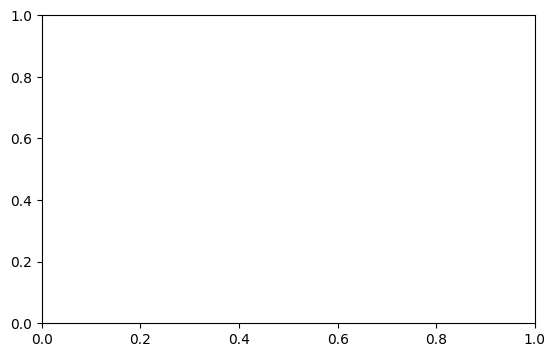

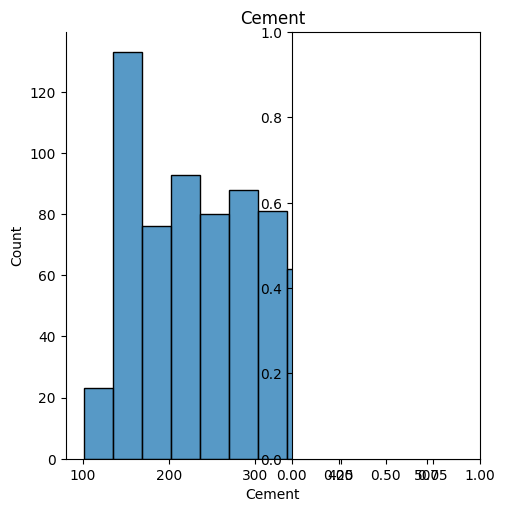

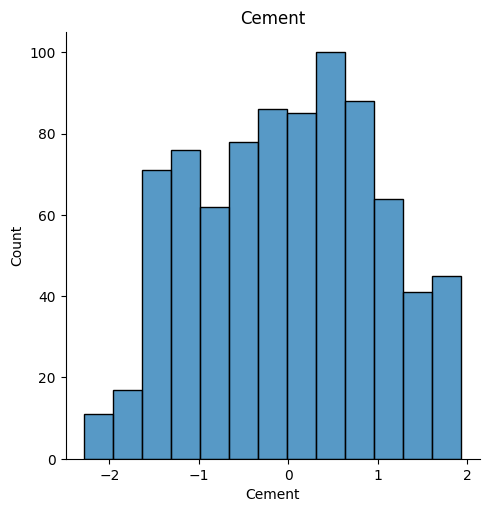

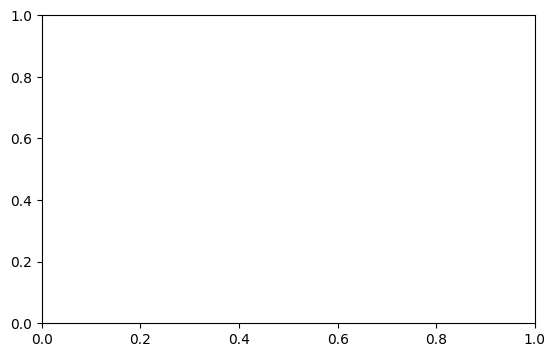

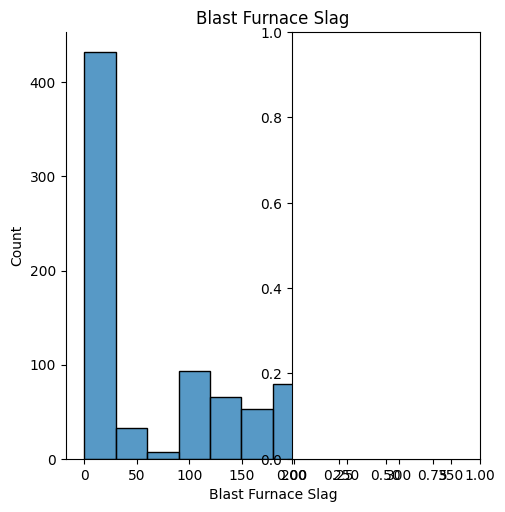

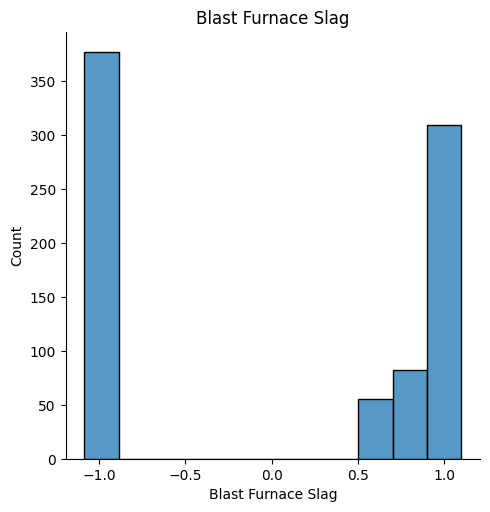

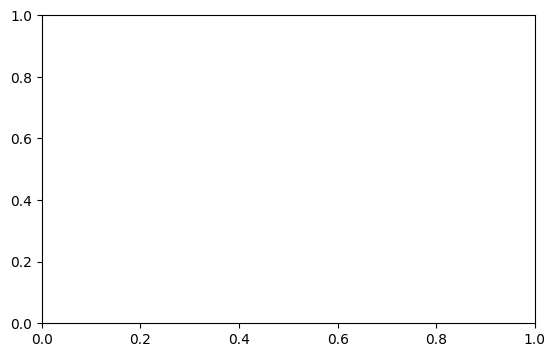

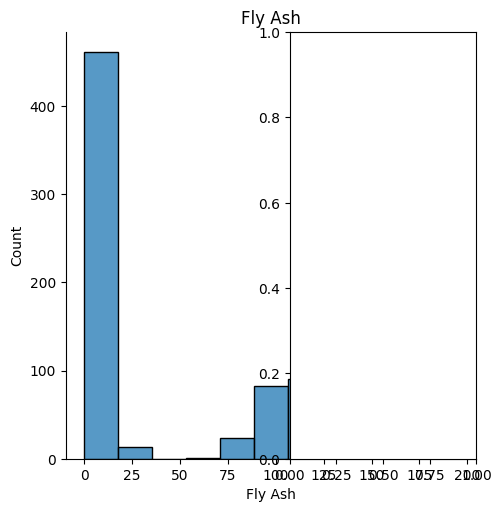

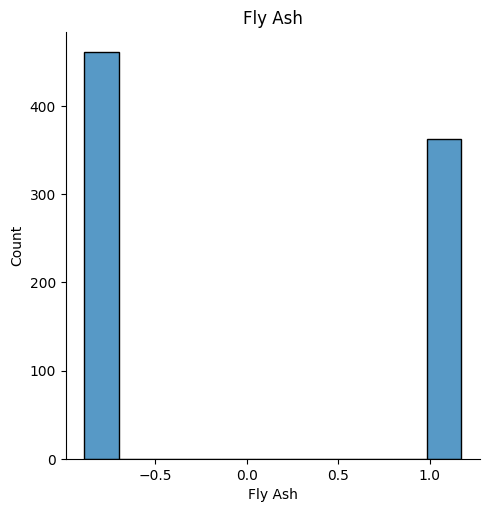

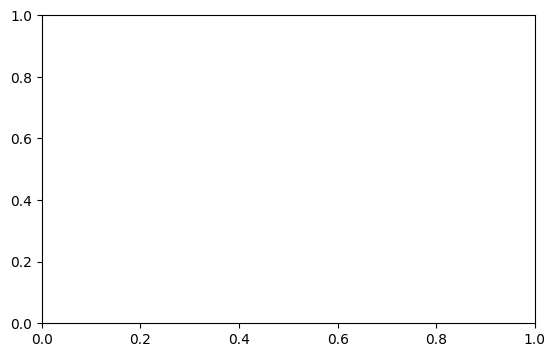

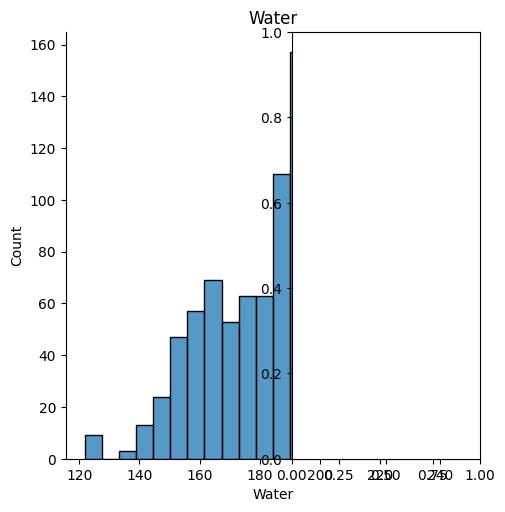

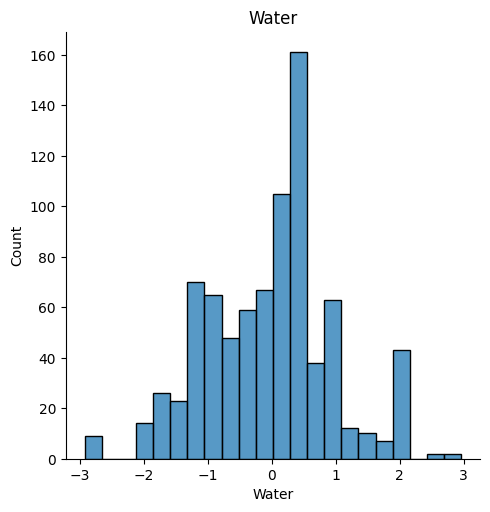

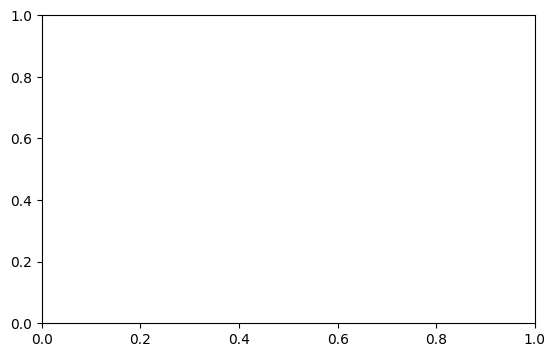

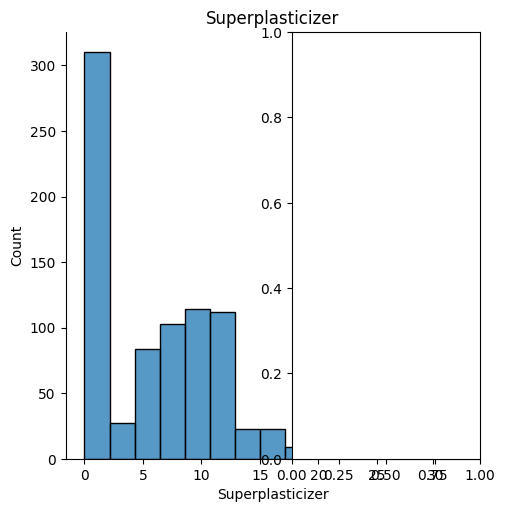

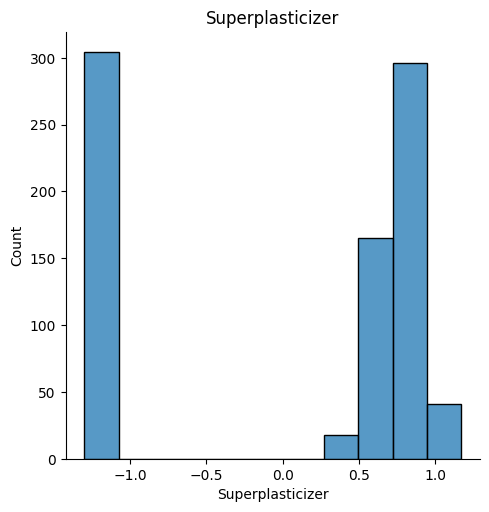

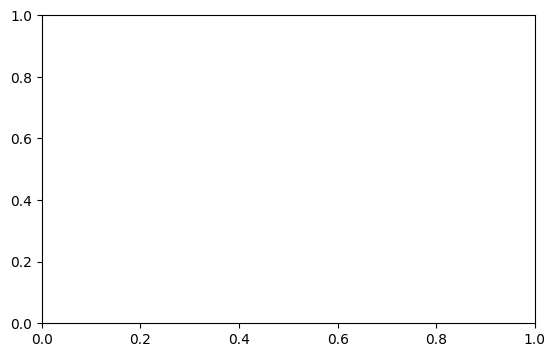

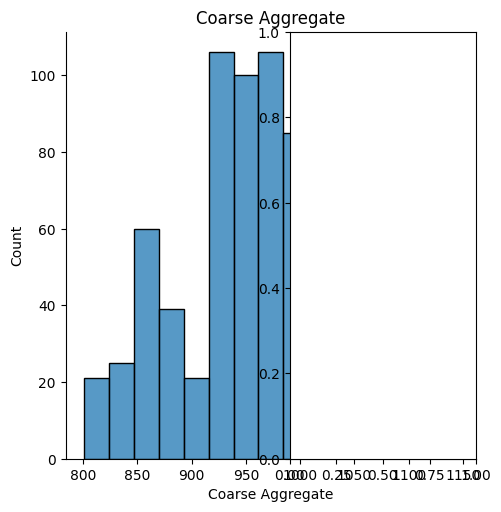

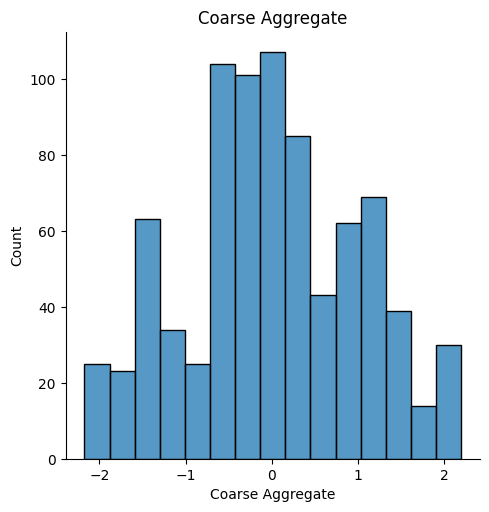

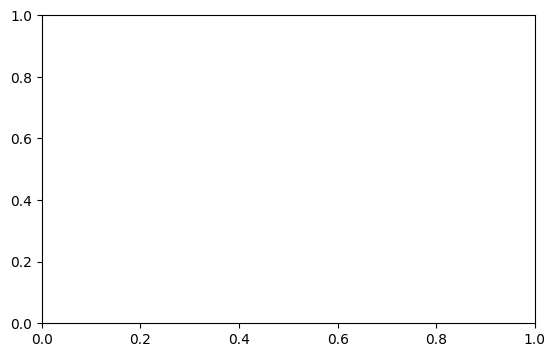

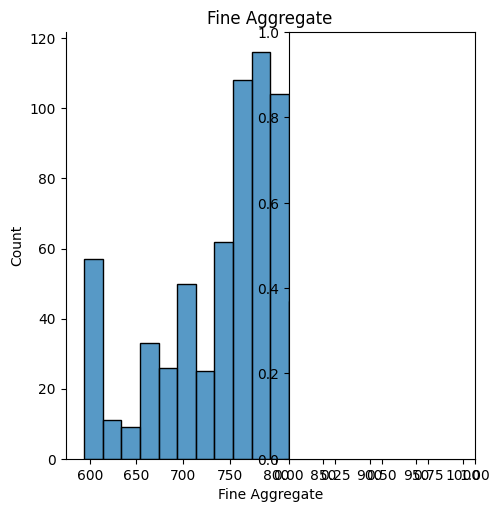

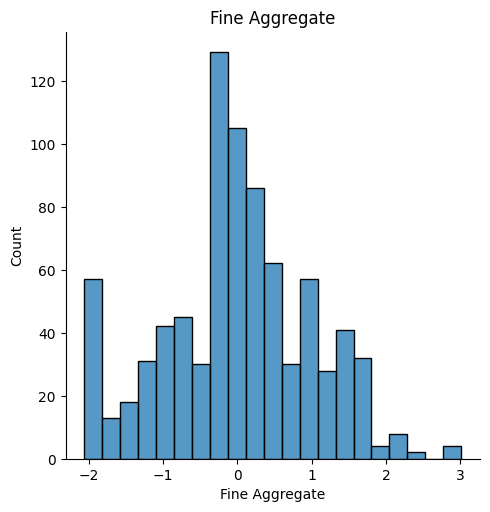

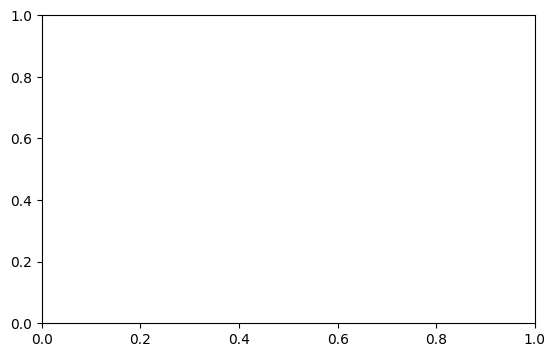

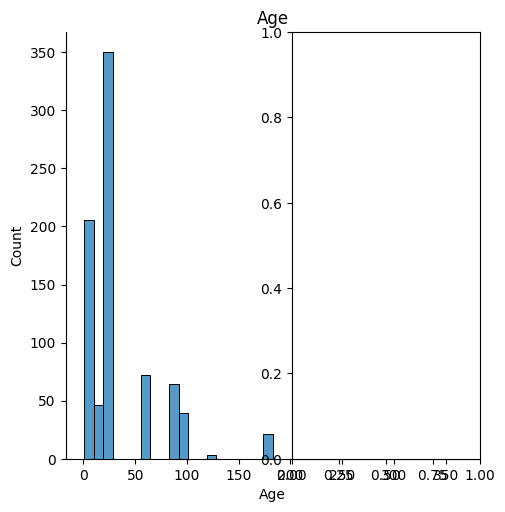

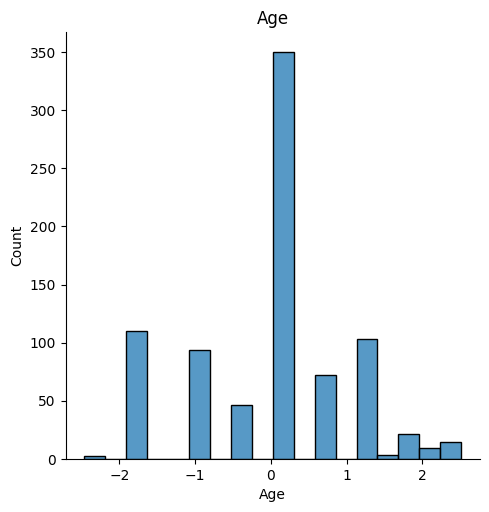

In [30]:
x_train_t=pd.DataFrame(x_train_t,columns=x_train.columns)
x_test_t=pd.DataFrame(x_test_t,columns=x_test.columns)
for col in x_train_t.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.displot(x_train[col])

  plt.title(col)
  plt.subplot(122)
  sns.displot(x_train_t[col])
  plt.title(col)
  plt.show()



In [31]:
pt1=PowerTransformer(method='yeo-johnson')
x_train_t1=pt1.fit_transform(x_train+0.00001)
x_test_t1=pt1.transform(x_test+0.00001)
lr=LinearRegression()
lr.fit(x_train_t1,y_train)
y_pred=lr.predict(x_test_t1)
r2_score(y_test,y_pred)


0.8161906740815313

In [32]:
pd.DataFrame({'columns':x_train.columns,'yeo-johnson_lambdas':pt1.lambdas_})

,columns,yeo-johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253934
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [33]:
from re import L
pt1=PowerTransformer(method='yeo-johnson')
x_train_t1=pt1.fit_transform(x_train+0.00001)
x_test_t1=pt1.transform(x_test+0.00001)
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

np.float64(0.46099404916628606)

In [34]:
pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_,'yeo-johnson_lambdas':pt1.lambdas_})

,cols,box-cox_lambdas,yeo-johnson_lambdas
0,Cement,0.177025,0.174348
1,Blast Furnace Slag,0.027842,0.015715
2,Fly Ash,-0.044554,-0.161447
3,Water,0.772682,0.771307
4,Superplasticizer,0.113892,0.253934
5,Coarse Aggregate,1.129813,1.130050
6,Fine Aggregate,1.782018,1.783100
7,Age,0.066630,0.019885


#**encoding numerical data**

descritization [binning]

binarization

---
used to handle outliers more effectvily  
and more speed work ,
to unifrom  data types and set

---
**unsuprviesd binning**

equal width

equal frequency

k means

**supervised binning**

decison tree binning

**custom binning**








In [35]:
import pandas as pd

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer




In [37]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(714, 3)

In [40]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [44]:
clf=DecisionTreeClassifier()

In [45]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [46]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

np.float64(0.6246870109546165)

In [47]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [48]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [49]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [50]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [51]:
trf.named_transformers_['first'].n_bins_

array([15])

In [52]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [53]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})


In [54]:
output.sample()

,age,age_trf,fare,fare_trf
30,40.0,11.0,27.7208,10.0


In [55]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [56]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

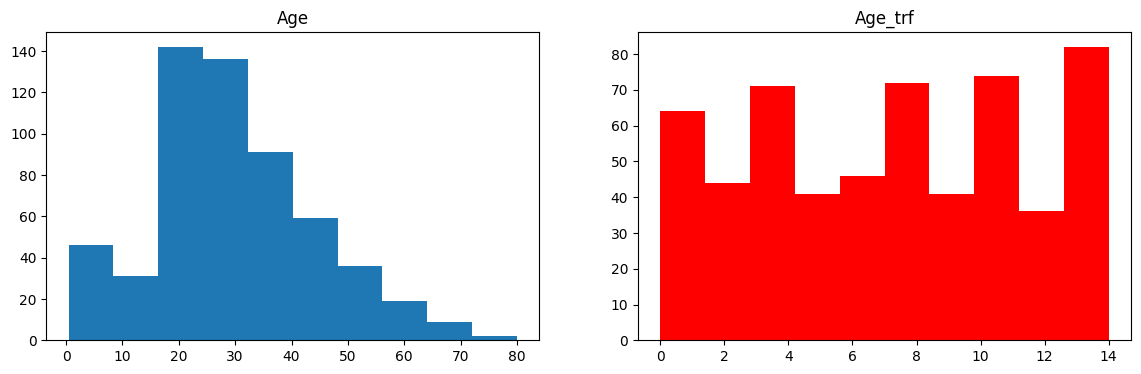

In [57]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Age'])
plt.title('Age')
plt.subplot(122)
plt.hist(x_train_trf[:,0],color='red')
plt.title('Age_trf')
plt.show()

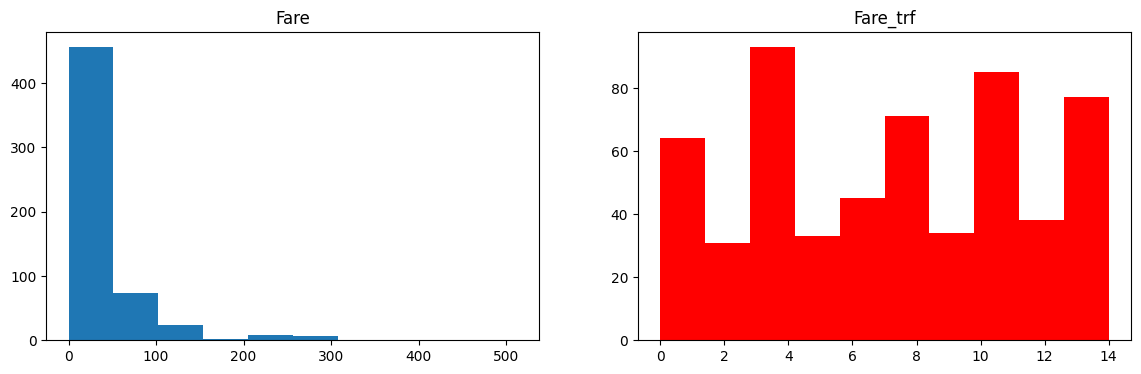

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Fare'])
plt.title('Fare')
plt.subplot(122)
plt.hist(x_train_trf[:,1],color='red')

plt.title('Fare_trf')
plt.show()

# how to handle mixed variable

In [59]:
import numpy as np
import pandas as pd

In [60]:
df=pd.read_csv('/content/titanic.csv')

In [61]:
df.head(3)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1


In [62]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

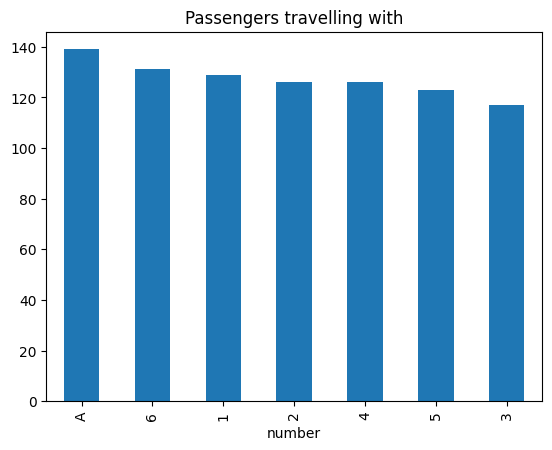

In [63]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [64]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [65]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [66]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [67]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [68]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head(3)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN


<Axes: xlabel='cabin_cat'>

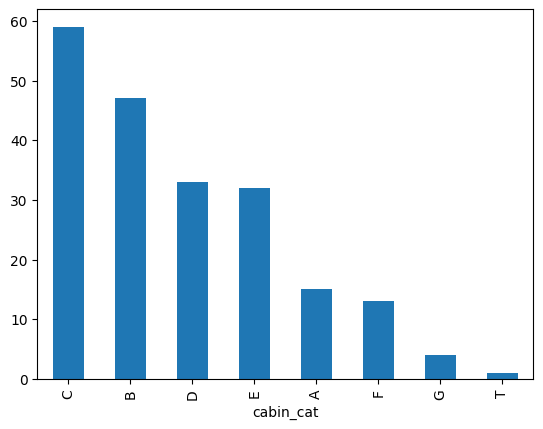

In [69]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [70]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [71]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

# date and time in ml
by just convert coloumn to date coloumn and perform its function